## 1. 라이브러리 설치

In [20]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
import time, random, datetime

In [21]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## 2. 스크래핑

In [22]:
def chromeWebdriver():
    chrome_service = ChromeService(executable_path=ChromeDriverManager().install())
    options = Options()
    options.add_experimental_option('detach', True)
    options.add_experimental_option('excludeSwitches', ['enable-logging'])
    user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36'
    options.add_argument(f'user-agent={user_agent}')

    driver = webdriver.Chrome(service=chrome_service, options=options)
    return driver

tmp_list=[]
driver=chromeWebdriver()
error_cnt=0

#진행 중인 사건 페이지 스크래핑 진행
for i in tqdm(range(0, 142)):
    url='https://prj.angrypeople.co.kr/progress/v/'+str(i)
    try:
        driver.get(url)
        html=driver.page_source
        soup=BeautifulSoup(html, 'html.parser')

        # 프로젝트 이름, 날짜, 변호사이름
        project_name=soup.select('div.title.mgt-2')[0].text.strip()
        project_date=soup.select('div.date.mgt-2')[0].text.strip()
        lawyer_name=soup.select('div.inner-name')[0].text.strip()
        tmp_list.append([project_name, project_date, lawyer_name])
        time.sleep(0.5)
    except: 
        error_cnt=error_cnt+1
df=pd.DataFrame(tmp_list)
df.columns=['프로젝트명','날짜','변호사명']
print(error_cnt)

[WDM] - Downloading: 100%|█████████████████████████████████████████████████████████| 6.79M/6.79M [00:09<00:00, 738kB/s]
100%|████████████████████████████████████████████████████████████████████████████████| 142/142 [03:45<00:00,  1.59s/it]

30


## 3. 데이터 확인하기

In [23]:
df

,프로젝트명,날짜,변호사명
0,대진침대 라돈 검출,2018년 07월 30일 ~\n 2018년 ...,황세정
1,김치냉장고 허위광고,2018년 07월 16일 ~\n 2018년 ...,박희정
2,까사미아 라돈 검출,2018년 08월 03일 ~\n 2018년 ...,황세정
3,여기어때 \n개인정보 유출,~,윤제선
4,BMW 집단소송,2019년 01월 07일 ~\n 2019년 ...,구본승
...,...,...,...
107,EBS 머니톡 개인정보 유용 집단소송,2022년 10월 13일 ~\n 2022년 ...,서치원
108,카카오 중단으로 인한 피해자 모집,2022년 10월 17일 ~,하종선
109,적반하장도 유분수! 비판 댓글 합의금 소송 대응,2022년 10월 17일 ~,박지영
110,장애아동 학대 교사 엄벌탄원,2022년 10월 26일 ~,신수경


In [25]:
df.to_csv('변호사명.csv', index=False)

## 4. 데이터 분석하기

In [24]:
df['변호사명'].nunique()

48

In [26]:
df=pd.read_csv('변호사명.csv')

In [27]:
tmp=df.groupby('변호사명').count()[['프로젝트명']]

In [28]:
tmp.rename(columns={'프로젝트명':'프로젝트 수'}, inplace=True)

<AxesSubplot:ylabel='Frequency'>

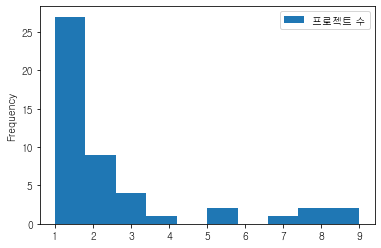

In [29]:
tmp.plot(kind='hist')

+ 프로젝트를 한 개만 낸 변호사 수가 많다.
+ 그 이상은 2, 3개를 낸 변호사 수가 많다.

In [30]:
len(tmp)

48

In [31]:
# 프로젝트 2개 이상 개설한 변호사 수
len(tmp[tmp['프로젝트 수']>1])

21

In [33]:
# 프로젝트 4개 이상 개설한 변호사 수
len(tmp[tmp['프로젝트 수']>=4])

8

In [36]:
#reset_index 메서드: 기본값으로 인덱스 값들을 DataFrame의 열로 전송하며, 새로운 단순한 정수 인덱스를 세팅한다.
# 즉, set_index()의 기능을 역으로 수행
tmp.reset_index(inplace=True)

In [37]:
tmpmtmp=tmp.groupby(['프로젝트 수']).count()

In [38]:
tmpmtmp

,index,변호사명
프로젝트 수,,
1,27,27
2,9,9
3,4,4
4,1,1
5,2,2
7,1,1
8,2,2
9,2,2


In [39]:
tmpmtmp.to_csv('프로젝트 수별 인원.csv', index=False)